<a href="https://colab.research.google.com/github/urusha-shrestha/Practical-Statistics-for-Data-Scientists/blob/main/Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 2 - Data and Sampling Distributions** #

###Random Sampling and Sample Bias
Sample: a subset of data from a larger set of data

Population: the larger set of data

Random Sampling:
* creates samples by randomly picking portions of the population
* each member of the population has an equal chance of being chosen for the sample (simple random sample)

Stratified sampling:
* dividing the population into strata (stratum: subgroup of the population having common characteristics) and randomly sampling from the strata

Bias: systematic error

Sample bias : a sample that misrepresents the population




###Selection Bias

Selection bias: bias resulting from the way in which the observations are selected

Data snooping: searching through data to find something interesting

Vast search effect:
* bias resulting from repeated data modeling, or modeling the data with large number of predictor values
* a form of selection bias

Target shuffling:
* one way to combat the vast search effect
* also known as permutation testing
* fit the model and calculate its efficiancy, shuffle the target variable around so that your data is wrong, refit the model and calculate the efficiancy, repeat these steps
* compare results with the original model

Regression to the Mean: if one sample of a random variable is extreme, the next sampling of the same variable is likely to be closer to its mean





###Sampling Distribution of a Statistic
Sample statistic: a metric calculated for a sample

Data distribution: distribution of individual data points

Sampling distribution: distribution of a sample statistic over many samples

Central Limit Theorem: the tendency of the sampling distribution to take on a normal shape as sample size increases

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
import scipy.stats as st

In [2]:
df = pd.read_csv('players.csv')
df

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [5]:
#splitting the height by -, multiplying the ft value with 12 and adding it to the inch value
df['height_inches']=df['height'].apply(lambda x: int(x.split("-")[0])*12 + int(x.split('-')[1]) if len(x.split('-'))==2 else int(x))
#lambda function lets us do a function in a single line
df

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


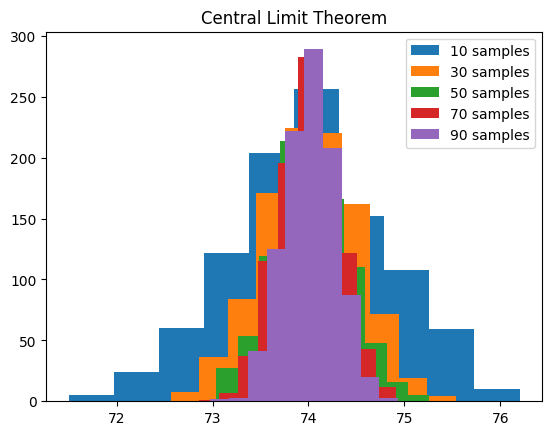

In [7]:
#range starts at 10, increases by 20 and goes up till 100
sample_amounts = range(10,100,20)

for x in sample_amounts:
  sample=[]
  for i in range(1000):
    sample.append(df['height_inches'].sample(x).mean())
  plt.hist(sample)
  plt.legend([str(z) + " samples" for z in sample_amounts])
  plt.title("Central Limit Theorem")

Standard Error:

* the variability of a sample statistic over many samples
* single metric that sums up the variability in the sampling distribution
* as the sample size increases, the standard error decreases
* the relationship between the standard error and sample size id referred to as the square root of n rule: to reduce the standard error by a factor of 2, the sample size must be increased by a factor of 4


In [8]:
#calculating standard error
df['height_inches'].sem()

0.05065243293253027

###Bootstrap

* standard way to estimate standard error
* draw additional samples, with replacement, from the sample itself and recalculate the statistic for each resample
* does not involve any assumptions about the data or the sample statistic being normally distributed

In [15]:
#implementing bootstrapping
results=[]
for x in range(1000):
  sample = resample(df['height_inches'])
  results.append(sample.mean())
results = pd.Series(results)
print("Bootstrap Statistics:")
print(f"original: {df['height_inches'].mean()}")
print(f"bias: {results.mean()-df['height_inches'].mean()}")
print(f"std error: {results.std()}")

Bootstrap Statistics:
original: 74.0106149341142
bias: 0.0014264275256294923
std error: 0.05308085020732255


###Confidence Interval

Confidence Interval:

* the interval that contains x% of the bootstrap sample statistic that we are gathering
* a range of values, derived from a data set, that is likely to contain the value of an unknown population parameter

Confidence Level:

* the percentage of confidence intervals constructed in the same way from the same population that are expected to contain the statistic of interest
* the probability that the confidence interval actually contains the true population parameter

In [21]:
#calculating confidence interval
#if we have fewer than 30 items in our sample, we can use t-distirbution
data = df['height_inches'].sample(20)
st.t.interval(confidence= 0.95, df=len(data)-1, loc=np.mean(data), scale = st.sem(data))

(71.9928020119307, 74.10719798806929)

In [22]:
#if we have more than 30 items, we can use normal distribution as we can ASSUME that the sample mean is normally distributed
#this does not mean that the data itself is normally distributed
data = df['height_inches']
st.norm.interval(confidence=0.95,loc=np.mean(data), scale=st.sem(data))

(73.91133798983711, 74.1098918783913)

###Normal/Gaussian Distribution

* 68% of the data lies within one standard deviation of the mean, and 95% lies within two standard deviations and 99.7% of the data are within three standard deviations

Error: the difference between a data point and a predicted or average value

Standardize: subtract the mean and divide by the standard deviation

z-score: the result of standardizing an individual data point

Standard normal: a normal distribution with mean 0 and standard deviation 1

QQ-plot (quantile-quantile plot)

* a plot to visualize how close a sample distribution is to a specified distribution
* if the qq plot is roughly diagonal going upward left to right, then it can be considered a normal distribution
* it orders the z-scores from low to high



((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

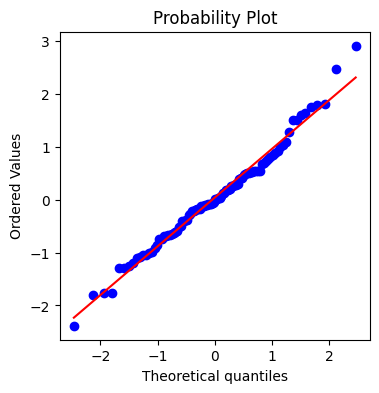

In [24]:
#example of normal distribution in qq plot
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = st.norm.rvs(size=100)
st.probplot(norm_sample,plot=ax)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

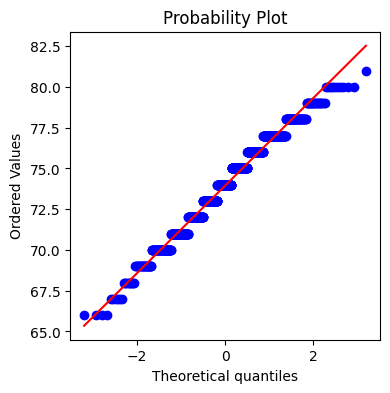

In [26]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample=df['height_inches'].sample(1000)
st.probplot(norm_sample, plot=ax)

###Long-Tailed Distributions

* distribution consisting of extremely high or low values
* skew: when one tail of the distribution is longer than the other

###Student's t-Distribution

* a normal distribution with a bit thicker and longer tails
* as the sample size increases, the t-distribution approaches the normal distribution
* degrees of freedom: a parameter related to the sample size, usually n-1 that allows the t-distribution to adjust different sample sizes

###Binomial Distribution

* Bernoulli distribution
* frequency distribution of the number of success(x) in a given number of trials(n) with specified probability(p) of success in each trial
* Binomial trial: a trial with two outcomes (Bernoulli trial)


###Chi-Square Distribution

* useful for determining whether multiple treatments differ from one another in their effects

* concerned with counts of subjects or items falling into categories

* low chi-square indicate that the set of counts closely follow the expected distribution
* high chi-square indicate that the counts differ significantly from the expected distribution

Chi-Square Statistic

* the extent to which the results depart from the null expectation of independence
* the difference between the observed and expected values, divided by the square root of the expected values, squared, then summed across all categories

### F- Distribution / ANOVA

* ANOVA (Analysis of Variance)
* measures the ratio of variability between group means and the variability within each group (residual variability).
* tests multiple treatments across groups but deals with measured continuous values rather than counts
* measures the extent to which differences among group means are greater



### Poisson Distribution

* the frequency distribution of the number of events in sampled units of time or space
* probability of a certain number of events happening in a given time or space
* example: the number of phone call receved by a call centre each minute of a 100 minute interval if we know that the centre receives 2 calls per minute


### Exponential Distribution

* the frequency distribution of the time or distance from one event to the next event
* example: the number of minutes between phone call assuming that we receive 0.2 calls per minute

Note: a key assumption for both poisson or exponential distribution is that the rate remains contant over the period being considered

### Weibull Distribution

* a generalized version of exponential distribution in which the event rate is allowed to change over time by a shape parameter called beta
* if beta>1, then the probability of an event happening increases over time
* if beta<1, then the probability of an event happening decreases over time
